In [13]:
## How polluted will your town air be? Pollution Level Forecasting
## Regression Problem
## Data ranges from year 2010 to 2014
## Data description
'''
https://www.airveda.com/blog/what-is-pm2-5-and-why-is-it-important
year: year of data in this row
month: month of data in this row
day: day of data in this row
hour: hour of data in this row
pm2.5: PM2.5 concentration (ug/m^3)
DEWP: Dew Point (â„ƒ)
TEMP: Temperature (â„ƒ)
PRES: Pressure (hPa)
cbwd: Combined wind direction
Iws: Cumulated wind speed (m/s)
Is: Cumulated hours of snow
Ir: Cumulated hours of rain

'''

'\nhttps://www.airveda.com/blog/what-is-pm2-5-and-why-is-it-important\nyear: year of data in this row\nmonth: month of data in this row\nday: day of data in this row\nhour: hour of data in this row\npm2.5: PM2.5 concentration (ug/m^3)\nDEWP: Dew Point (\xc3\xa2\xe2\x80\x9e\xc6\x92)\nTEMP: Temperature (\xc3\xa2\xe2\x80\x9e\xc6\x92)\nPRES: Pressure (hPa)\ncbwd: Combined wind direction\nIws: Cumulated wind speed (m/s)\nIs: Cumulated hours of snow\nIr: Cumulated hours of rain\n\n'

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
data = pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv")

In [48]:
data.shape

(43824, 13)

In [49]:
print data.head()

   No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0


In [50]:
## checking the number of null values in each.
data.isna().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [51]:
## from the above it is clear that only pm2.5(concentration) has 2067 NaN values, which is comparitively very less to the
## size of the dataframe, i.e 43824

In [52]:
## checking type of data
data.dtypes

No         int64
year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd      object
Iws      float64
Is         int64
Ir         int64
dtype: object

In [117]:
## for the descriptive statistics of the data.
data.describe()
print data['day'].max()

31


In [54]:
## from the above statistics we infer:
## std for pm2.5 is 92.050, which implies that values in the dataset are are spread out as the std is greater than 1/3rd(AM)

In [55]:
## Target_NaN_df contains all the rows that had pm2.5 as NaN, i.e 2067 rows
Target_NaN_df = data[data['pm2.5'].isna()]
print Target_NaN_df.shape

(2067, 13)


In [59]:
data_refined = data.dropna(subset=['pm2.5'])
print data_refined.isna().sum()

No       0
year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64


In [88]:
## let's start exploring relationships with some visuals.
%matplotlib inline
sns.set(color_codes = True)

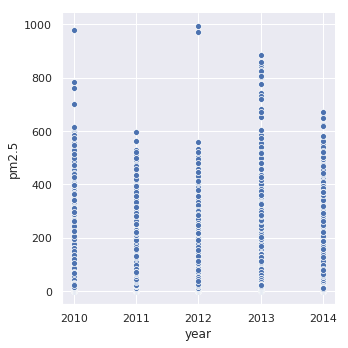

In [113]:
plt.rcParams['figure.figsize'] = [8 ,8]

sns.relplot(data=data_refined,x="year", y="pm2.5") 

## plot shows that 2013 saw the highest concentration of particulate matter

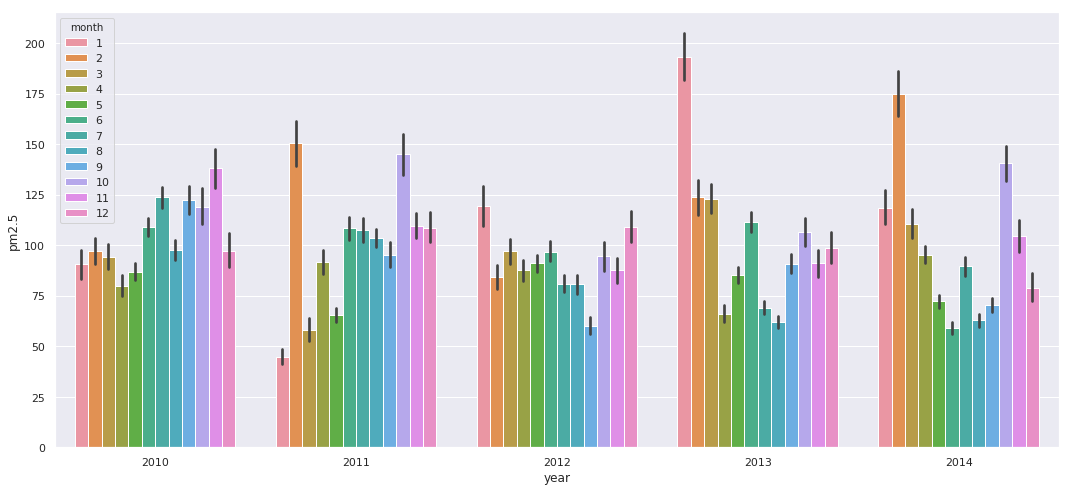

In [114]:
## plot shows the distribution across various months from 2010-2014
plt.rcParams['figure.figsize'] = [18 ,8]

sns.barplot(data=data_refined,x="year", y="pm2.5", hue="month") 

## the concentration in January has spiked to high levels, i.e January 2013 saw increased levels of pm2.5
## as compared to other months.

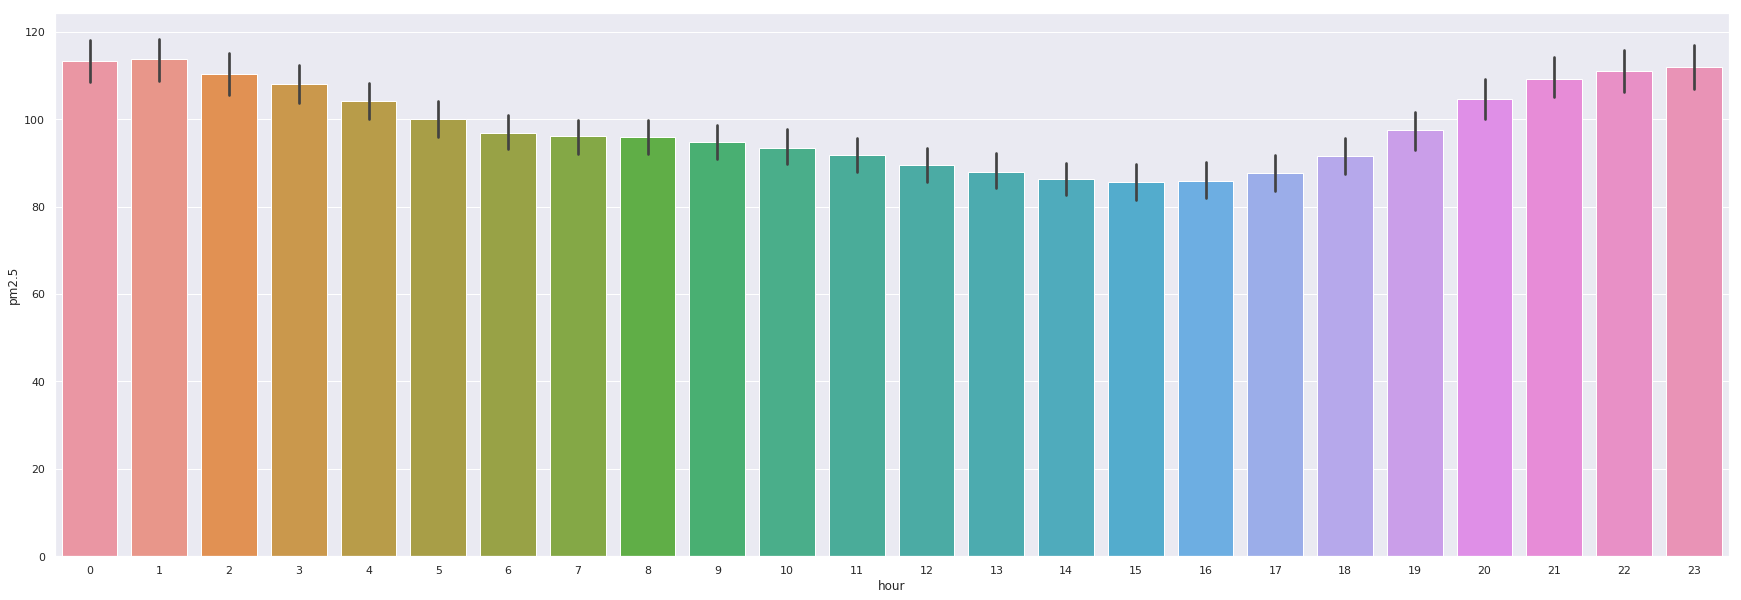

In [127]:
## plot shows the distribution across various months from 2010-2014
plt.rcParams['figure.figsize'] = [30, 10]

sns.barplot(data=data_refined,x="hour", y="pm2.5") 

## this essentially shows a common trend with spikes between (0-2, 20-23) hours, which implies that the
## air quality from 9pm to 3am is at its worst. 
## This could be due to high trafic and may point to the other likely sources of pollution.

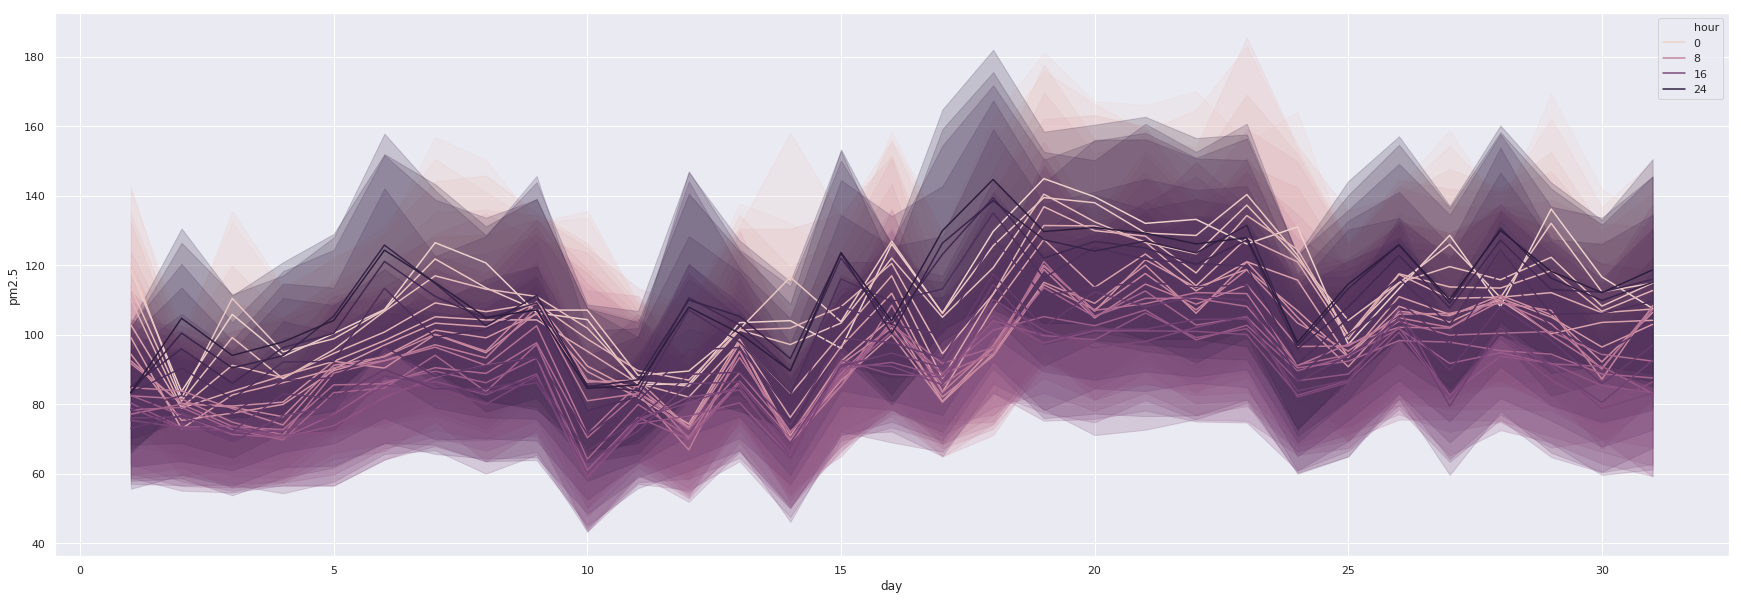

In [123]:
## plot shows the distribution across various months from 2010-2014
plt.rcParams['figure.figsize'] = [30, 10]

sns.lineplot(data=data_refined,x="day", y="pm2.5", hue="hour") 

## can't make sense out of it but it loos impressive;)

In [ ]:
#sns.lineplot(data=data_refined,x="DEWP", y="pm2.5", hue="year") 
#sns.lineplot(data=data_refined,x="TEMP", y="pm2.5")

[Text(0,0.5,'pm2.5')]

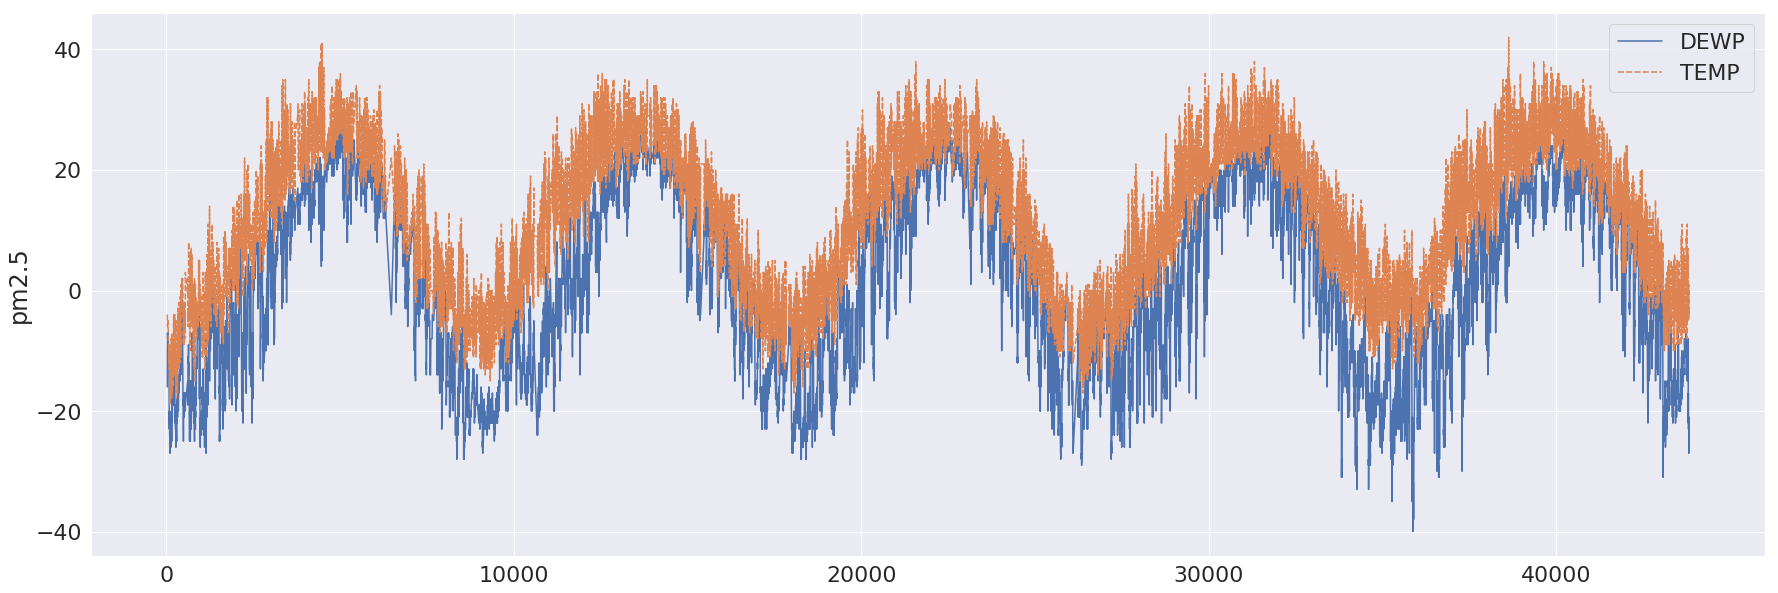

In [166]:
## making a combined lineplot
sns.set(font_scale = 2)
df = data_refined.iloc[:,6:8]
plot = sns.lineplot(data=df)
plot.set(ylabel = "pm2.5")

[Text(0,0,'991.0'),
 Text(0,0,'992.0'),
 Text(0,0,'993.0'),
 Text(0,0,'994.0'),
 Text(0,0,'995.0'),
 Text(0,0,'996.0'),
 Text(0,0,'997.0'),
 Text(0,0,'998.0'),
 Text(0,0,'999.0'),
 Text(0,0,'1000.0'),
 Text(0,0,'1001.0'),
 Text(0,0,'1002.0'),
 Text(0,0,'1003.0'),
 Text(0,0,'1004.0'),
 Text(0,0,'1005.0'),
 Text(0,0,'1006.0'),
 Text(0,0,'1007.0'),
 Text(0,0,'1008.0'),
 Text(0,0,'1009.0'),
 Text(0,0,'1010.0'),
 Text(0,0,'1011.0'),
 Text(0,0,'1012.0'),
 Text(0,0,'1013.0'),
 Text(0,0,'1014.0'),
 Text(0,0,'1015.0'),
 Text(0,0,'1016.0'),
 Text(0,0,'1017.0'),
 Text(0,0,'1018.0'),
 Text(0,0,'1019.0'),
 Text(0,0,'1019.5'),
 Text(0,0,'1020.0'),
 Text(0,0,'1021.0'),
 Text(0,0,'1022.0'),
 Text(0,0,'1023.0'),
 Text(0,0,'1024.0'),
 Text(0,0,'1025.0'),
 Text(0,0,'1026.0'),
 Text(0,0,'1027.0'),
 Text(0,0,'1027.5'),
 Text(0,0,'1028.0'),
 Text(0,0,'1029.0'),
 Text(0,0,'1029.666667'),
 Text(0,0,'1030.0'),
 Text(0,0,'1031.0'),
 Text(0,0,'1032.0'),
 Text(0,0,'1032.333333'),
 Text(0,0,'1033.0'),
 Text(0,0,'1

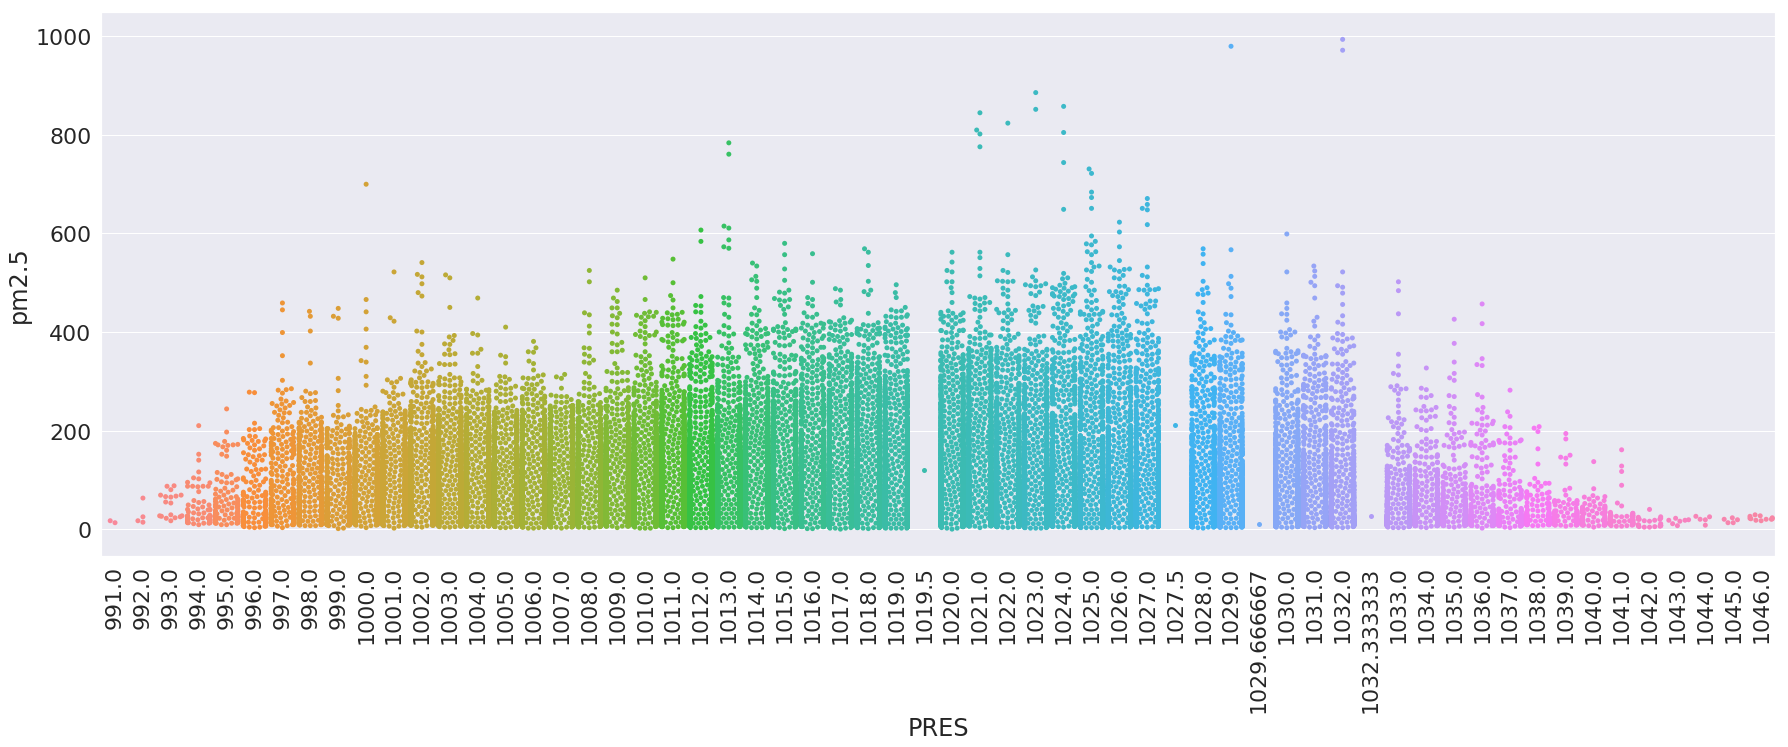

In [169]:
plot = sns.swarmplot(data=data_refined,x="PRES", y="pm2.5") 
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)

In [171]:
## use scikit learn for linear regression

X = data_refined.loc[:, data_refined.columns != 'pm2.5' ]
Y = data_refined['pm2.5']